# Linear Regression

### Setup

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = [1,2,3,4,5]
Y = [1,1.5,4,3.5,4.2]

### Finding Bounds

In [3]:
min_m = float('inf')
max_m = -float('inf')
# find min and max slopes between  all possible points in X and Y
for i in range(len(X)):
    for j in range(len(X)):
        if i != j:
            m = (Y[i] - Y[j]) / (X[i] - X[j])
            if m < min_m:
                min_m = m
            if m > max_m:
                max_m = m
print("Range of slopes")
print("min_m: ", min_m)
print("max_m: ", max_m)

min_h = float('inf')
max_h = -float('inf')
# find min and max intercepts between all possible points in X and Y
for i in range(len(X)):
    for j in range(len(X)):
        if i != j:
            h = Y[i] - (m * X[i])
            if h < min_h:
                min_h = h
            if h > max_h:
                max_h = h
print("Range of intercepts")
print("min_h: ", min_h)
print("max_h: ", max_h)

Range of slopes
min_m:  -0.5
max_m:  2.5
Range of intercepts
min_h:  0.09999999999999964
max_h:  1.8999999999999995


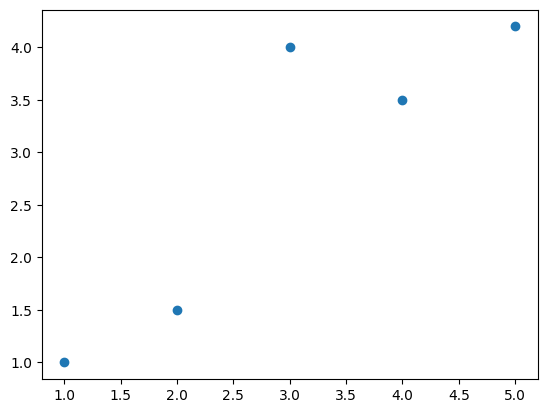

In [4]:
#plot of X and  Y points
plt.scatter(X,Y)

## Brute Force to find Least Squares Line

In [10]:
mValues = np.arange(min_m, max_m+0.001, 0.01)
hValues = np.arange(min_h, max_h+0.001, 0.01)
# convert to lists
mValues = mValues.tolist()
hValues = hValues.tolist()

In [11]:
def square_error(X,Y,m,h):
  error = 0
  for i in range(len(X)):
    error += ((m*X[i]+h-Y[i])**2)/(m**2+1)
  return error

In [17]:
# Record the start time
start_time = time.time()

best_m = None
best_h = None
least_error = float('inf')
for m in np.linspace(min_m, max_m, 100):
  for h in np.linspace(min_h, max_h, 100):
    temp_error = square_error(X,Y,m,h)
    if temp_error < least_error:
      least_error = temp_error
      best_m = m
      best_h = h

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the results
print("Brute Force Method:")
print("Best m:", best_m)
print("Best h:", best_h)
print("Minimized Error:", least_error)
print(f"Time elapsed: {elapsed_time} seconds")



Brute Force Method:
Best m: 0.9242424242424243
Best h: 0.09999999999999964
Minimized Error: 0.9881886839172955
Time elapsed: 0.11144280433654785 seconds


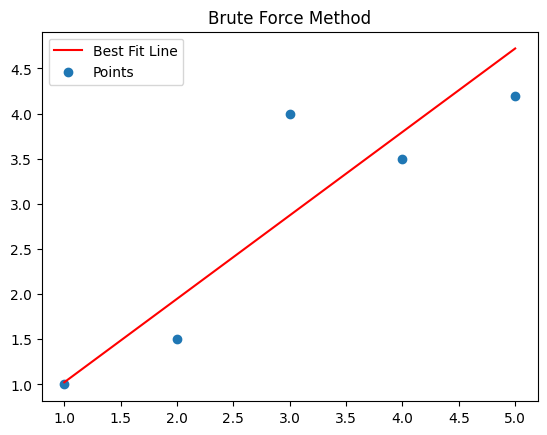

In [20]:
#plot the  results
plt.plot(X, best_m*np.array(X)+best_h, color='red')
plt.scatter(X,Y)
plt.title("Brute Force Method")
plt.legend(["Best Fit Line", "Points"])
plt.show()


## Monte Carlo

In [21]:
# Record the start time
start_time = time.time()

best_m = None
best_h = None
least_error = float('inf')
for i in range(100000):
    m = np.random.uniform(min_m, max_m)
    h = np.random.uniform(min_h, max_h)
    temp_error = square_error(X,Y,m,h)
    if temp_error < least_error:
        least_error = temp_error
        best_m = m
        best_h = h

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the results
print("Monte Carlo Method:")
print("Best m:", best_m)
print("Best h:", best_h)
print("Minimized Error:", least_error)
print(f"Time elapsed: {elapsed_time} seconds")

Monte Carlo Method:
Best m: 0.916184153983894
Best h: 0.10832739444608704
Minimized Error: 0.9869910900971268
Time elapsed: 1.4264230728149414 seconds


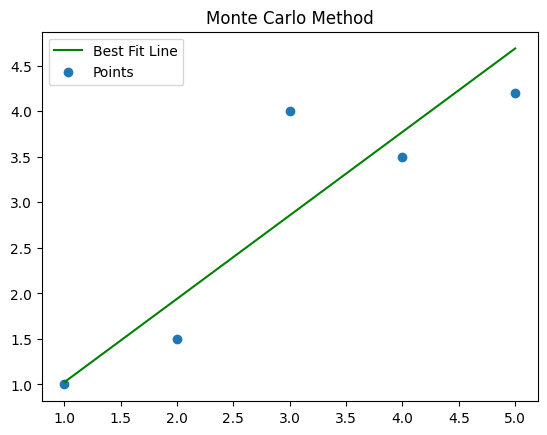

In [23]:
#plot the  results
plt.plot(X, best_m*np.array(X)+best_h, color='green')
plt.scatter(X,Y)
plt.title("Monte Carlo Method")
plt.legend(["Best Fit Line", "Points"])
plt.show()